In [92]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy as sp
import math
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.covariance import EllipticEnvelope
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

In [93]:
#Function to do Plotting
def plot_column_data(columns):

    for col in columns:
        
        plt.figure(figsize=(2,2))
    
        sns.distplot(df[col])
       
        plt.figure(figsize=(2,2))
       
        df.boxplot([col])


Point 1: Import and store data in a Dataframe

In [94]:
url="http://www.stat.ufl.edu/~winner/data/airq402.dat"

df=pd.read_fwf(url,header=None)

df.columns=["City1","City2","Average_Fare_Col1","Distance","Average_Weekly_Passengers",\
            "Market_Leading_Airline","Market_Share_Col1","Average_Fare_Col2","Low_Price_Airline",\
            "Market_Share_Col2","Price"]
df.head()

,City1,City2,Average_Fare_Col1,Distance,Average_Weekly_Passengers,Market_Leading_Airline,Market_Share_Col1,Average_Fare_Col2,Low_Price_Airline,Market_Share_Col2,Price
0,CAK,ATL,114.47,528,424.56,FL,70.19,111.03,FL,70.19,111.03
1,CAK,MCO,122.47,860,276.84,FL,75.10,123.09,DL,17.23,118.94
2,ALB,ATL,214.42,852,215.76,DL,78.89,223.98,CO,2.77,167.12
3,ALB,BWI,69.40,288,606.84,WN,96.97,68.86,WN,96.97,68.86
4,ALB,ORD,158.13,723,313.04,UA,39.79,161.36,WN,15.34,145.42


Exploratory Data Analysis

In [95]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Average_Fare_Col1,1000.0,163.37542,55.365470,50.52,125.9750,161.345,197.3925,401.23
Distance,1000.0,1056.97300,643.203251,108.00,553.5000,919.000,1452.5000,2724.00
Average_Weekly_Passengers,1000.0,672.27914,766.519254,181.41,257.1975,404.780,769.9125,8950.76
Market_Share_Col1,1000.0,60.12859,19.367779,17.68,46.5100,59.240,73.5100,100.00
Average_Fare_Col2,1000.0,166.64756,62.660140,50.52,124.0850,161.400,202.9775,490.03
Market_Share_Col2,1000.0,34.55148,27.096999,1.06,13.1950,26.140,52.9725,100.00
Price,1000.0,143.19309,47.229184,49.61,113.7675,137.825,168.5300,387.94


In [96]:
df.dtypes

City1                         object
City2                         object
Average_Fare_Col1            float64
Distance                       int64
Average_Weekly_Passengers    float64
Market_Leading_Airline        object
Market_Share_Col1            float64
Average_Fare_Col2            float64
Low_Price_Airline             object
Market_Share_Col2            float64
Price                        float64
dtype: object

In [97]:
df.select_dtypes(include=["object"]).columns

Index(['City1', 'City2', 'Market_Leading_Airline', 'Low_Price_Airline'], dtype='object')

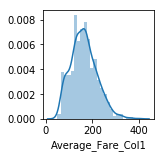

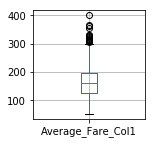

In [98]:
# Detecting and Removing the Outliers from Target Column: Average_Fare_Col1 so that Mean Encoding

# can be done to the Categorical Data

plot_column_data(["Average_Fare_Col1"])


In [99]:
#Removing the Outliers from Target Column: Average_Fare_Col1 using IQR

q1, q3 = np.percentile(df["Average_Fare_Col1"], [25, 75])
    
iqr = q3 - q1
    
lower_bound = q1 - (iqr * 1.5)
    
upper_bound = q3 + (iqr * 1.5)  

criteria1=df["Average_Fare_Col1"] < lower_bound 
    
criteria2=df["Average_Fare_Col1"] > upper_bound

print("Before deleting the outliers from Target column, length of Dataframe is:",len(df))

print("\nNumber of outliers in Target column are:",len(df[criteria1|criteria2]))

df.drop(df[criteria1|criteria2].index,axis=0,inplace=True)

print("\nAfter deleting the outliers from Target column, length of Dataframe is:",len(df))


Before deleting the outliers from Target column, length of Dataframe is: 1000

Number of outliers in Target column are: 15

After deleting the outliers from Target column, length of Dataframe is: 985


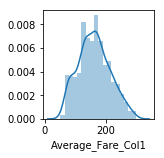

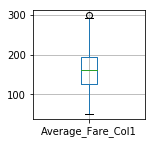

In [100]:
#After removing the outliers from Target Column: Average_Fare_Col1, plotting Target Column

plot_column_data(["Average_Fare_Col1"])

In [101]:
#Encoding the Categorical Columns using the Mean Encoding

mean_encode_city1=df.groupby("City1")["Average_Fare_Col1"].mean()
df["City1_Mean_Encode"]=df["City1"].map(mean_encode_city1)

mean_encode_city2=df.groupby("City2")["Average_Fare_Col1"].mean()
df["City2_Mean_Encode"]=df["City2"].map(mean_encode_city2)

mean_encode_market_leading_airline=df.groupby("Market_Leading_Airline")["Average_Fare_Col1"].mean()
df["Market_Leading_Airline_Mean_Encode"]=df["Market_Leading_Airline"].map(mean_encode_market_leading_airline)

mean_encode_low_price_airline=df.groupby("Low_Price_Airline")["Average_Fare_Col1"].mean()
df["Low_Price_Airline_Mean_Encode"]=df["Low_Price_Airline"].map(mean_encode_low_price_airline)


In [102]:
df.head()

,City1,City2,Average_Fare_Col1,Distance,Average_Weekly_Passengers,Market_Leading_Airline,Market_Share_Col1,Average_Fare_Col2,Low_Price_Airline,Market_Share_Col2,Price,City1_Mean_Encode,City2_Mean_Encode,Market_Leading_Airline_Mean_Encode,Low_Price_Airline_Mean_Encode
0,CAK,ATL,114.47,528,424.56,FL,70.19,111.03,FL,70.19,111.03,118.4700,180.460000,104.520625,130.459500
1,CAK,MCO,122.47,860,276.84,FL,75.10,123.09,DL,17.23,118.94,118.4700,139.422791,104.520625,171.747219
2,ALB,ATL,214.42,852,215.76,DL,78.89,223.98,CO,2.77,167.12,148.0275,180.460000,168.777702,183.737209
3,ALB,BWI,69.40,288,606.84,WN,96.97,68.86,WN,96.97,68.86,148.0275,140.435000,115.954202,124.530304
4,ALB,ORD,158.13,723,313.04,UA,39.79,161.36,WN,15.34,145.42,148.0275,157.675556,179.486118,124.530304


Point 2: Removing the Outliers from each individual Feature treating data as: Univariate Data 
         
        Removing Outliers from all obseravations collectively as well: Multivariate Data

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


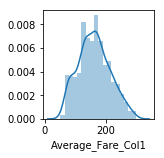

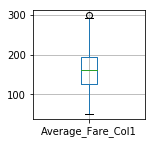

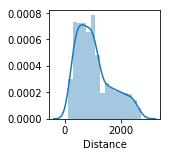

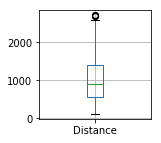

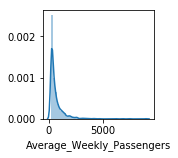

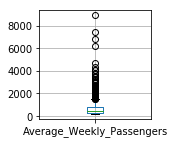

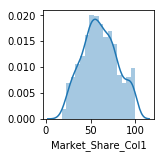

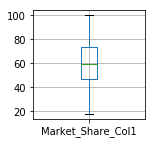

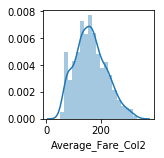

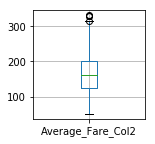

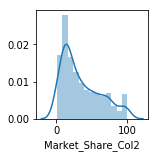

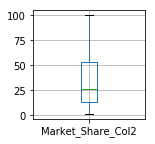

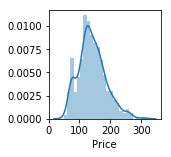

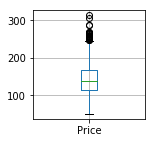

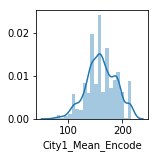

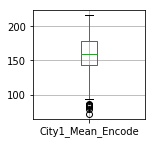

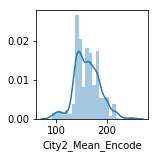

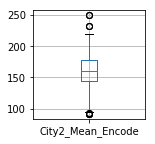

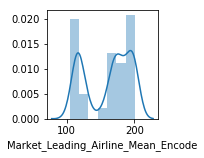

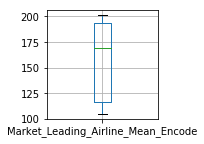

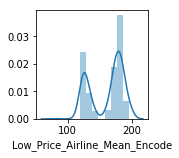

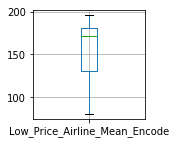

In [134]:
#Plotting Features to show the presence of outliers

df_for_outliers=df.drop(["City1","City2","Market_Leading_Airline","Low_Price_Airline"],axis=1)

plot_column_data(df_for_outliers)

In [104]:
#Removing the Outliers from each Independent Variable using IQR

for col in df_for_outliers.columns:

    q1, q3 = np.percentile(df_for_outliers[col], [25, 75])  
        
    iqr = q3 - q1
    
    lower_bound = q1 - (iqr * 1.5)
    
    upper_bound = q3 + (iqr * 1.5)  
    
    criteria1=df_for_outliers[col] < lower_bound 
    
    criteria2=df_for_outliers[col] > upper_bound
    
    print("Before deleting the outliers from",col,"length of Dataframe is:",len(df_for_outliers))
    
    print("\nNumber of Outliers in",col,"are:",len(df_for_outliers[criteria1|criteria2]))
    
    df_for_outliers.drop(df_for_outliers[criteria1|criteria2].index,axis=0,inplace=True)
    
    print("\nAfter deleting the outliers from",col,"length of Dataframe is:",len(df_for_outliers))
    
    print("\n")

Before deleting the outliers from Average_Fare_Col1 length of Dataframe is: 985

Number of Outliers in Average_Fare_Col1 are: 1

After deleting the outliers from Average_Fare_Col1 length of Dataframe is: 984


Before deleting the outliers from Distance length of Dataframe is: 984

Number of Outliers in Distance are: 4

After deleting the outliers from Distance length of Dataframe is: 980


Before deleting the outliers from Average_Weekly_Passengers length of Dataframe is: 980

Number of Outliers in Average_Weekly_Passengers are: 77

After deleting the outliers from Average_Weekly_Passengers length of Dataframe is: 903


Before deleting the outliers from Market_Share_Col1 length of Dataframe is: 903

Number of Outliers in Market_Share_Col1 are: 0

After deleting the outliers from Market_Share_Col1 length of Dataframe is: 903


Before deleting the outliers from Average_Fare_Col2 length of Dataframe is: 903

Number of Outliers in Average_Fare_Col2 are: 3

After deleting the outliers from 

In [105]:
#Removing the Outliers treating data as Multivariate Data using EllipticEnvelope

print("\nLength of Dataframe before finding and deleting the multivariate cols:",len(df_for_outliers))

outlier_detector=EllipticEnvelope(contamination=0.1)

outlier_detector.fit(df_for_outliers)

outliers_by_elliptic=outlier_detector.predict(df_for_outliers)

df_for_outliers["outliers_by_elliptic"]=outliers_by_elliptic

outlier_rows_elliptic=df_for_outliers[df_for_outliers["outliers_by_elliptic"]==-1].index

print("\nTotal number of outlier observations for Multivariate Data:",len(outlier_rows_elliptic))

print("\nDeleting the Outliers")

df_for_outliers.drop(outlier_rows_elliptic,axis=0,inplace=True)

print("\nTotal number of rows after deleting the outliers:",len(df_for_outliers))

df_for_outliers.drop(["outliers_by_elliptic"],axis=1,inplace=True)




Length of Dataframe before finding and deleting the multivariate cols: 864

Total number of outlier observations for Multivariate Data: 87

Deleting the Outliers

Total number of rows after deleting the outliers: 777


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


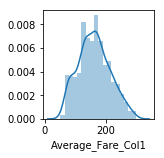

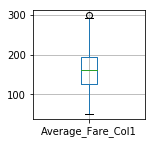

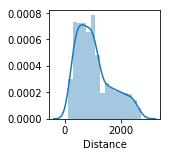

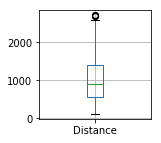

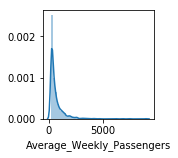

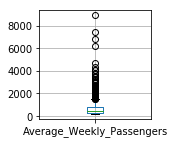

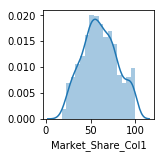

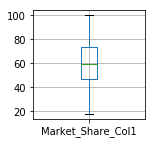

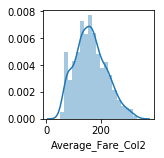

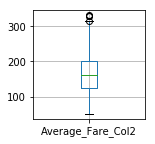

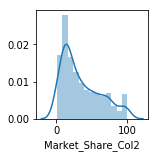

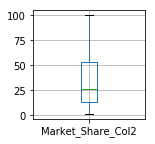

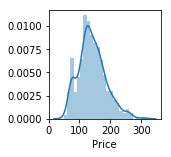

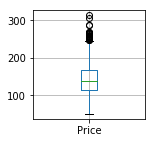

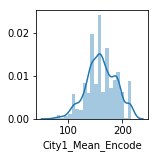

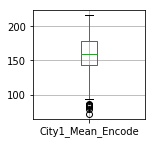

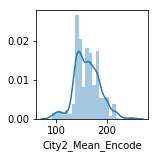

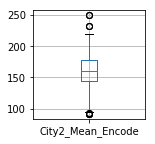

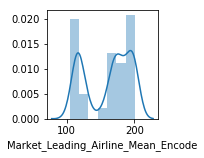

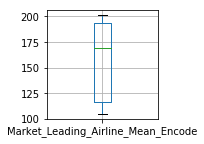

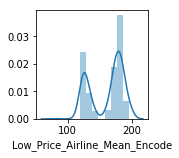

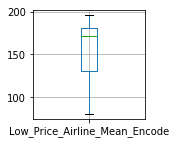

In [106]:
#Plotting Independent Variables once again after removing the Outliers

plot_column_data(df_for_outliers)

Standardizing the Data so that Regression can be performed to verify other Assumptions of Linear Regression

In [107]:
#Standardizing Dependent and Independent Variables using StandardScaler

scaler=StandardScaler()

scaled_data=scaler.fit_transform(df_for_outliers)

scaled_df=pd.DataFrame(scaled_data,columns=df_for_outliers.columns)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [108]:
scaled_df.head()

,Average_Fare_Col1,Distance,Average_Weekly_Passengers,Market_Share_Col1,Average_Fare_Col2,Market_Share_Col2,Price,City1_Mean_Encode,City2_Mean_Encode,Market_Leading_Airline_Mean_Encode,Low_Price_Airline_Mean_Encode
0,-0.879841,-0.822779,-0.246577,0.569309,-0.911673,1.235786,-0.731219,-1.576018,1.044131,-1.594711,-1.119786
1,-0.696176,-0.272839,-0.688020,0.825941,-0.653878,-0.751442,-0.533685,-1.576018,-0.740558,-1.594711,0.469453
2,1.414828,-0.286090,-0.870550,1.024034,1.502758,-1.294027,0.669501,-0.415543,1.044131,0.315945,0.930969
3,-1.914566,-1.220327,0.298145,1.969026,-1.813104,2.240656,-1.784318,-0.415543,-0.696537,-1.254739,-1.348011
4,0.122512,-0.499772,-0.579841,-1.019616,0.164186,-0.822361,0.127593,-0.415543,0.053247,0.634355,-1.348011


Point 3: Creating the Dependent Variable and Independent Variable

In [109]:
features=df_for_outliers.drop(["Average_Fare_Col1"],axis=1)

target=df_for_outliers["Average_Fare_Col1"]

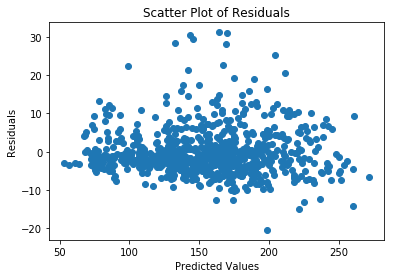

In [110]:
#Regression that will check the Residual Plot to verify Other Linear Assumptions

regression=LinearRegression()

model=regression.fit(features,target)

predicted_target=model.predict(features)

plt.xlabel("Predicted Values")

plt.ylabel("Residuals")

plt.title("Scatter Plot of Residuals")

plt.scatter(x=predicted_target,y=(target-predicted_target))

Since Residual Plot is pretty symmetrically distributed, tending to cluster towards the middle of the plot.

So Followig Assumptions of Linear Model are fine till now :
    
    1. There exist straight linear relationship between the response variable and predictors
    
    2. Errors are uncorrelated
    
    3. Homoscedasticity i.e. constant variance of error terms


In [111]:
#Checking for Multi-Collinearity Assumption of Linear Regression via calcuation of VIF

cc = sp.corrcoef(features, rowvar=False)

VIF = np.linalg.inv(cc)

vif_scores=VIF.diagonal()

i=0

for vif in vif_scores:
    
    print(features.columns[i],"VIF -->",vif)
    
    print("\n")
    
    i=i+1


Distance VIF --> 2.134500778733446


Average_Weekly_Passengers VIF --> 1.180006694851094


Market_Share_Col1 VIF --> 1.6048102889300455


Average_Fare_Col2 VIF --> 11.60524350395536


Market_Share_Col2 VIF --> 1.7966829805823885


Price VIF --> 9.275748688219776


City1_Mean_Encode VIF --> 1.691158727944252


City2_Mean_Encode VIF --> 1.4764666300775013


Market_Leading_Airline_Mean_Encode VIF --> 2.090237044819227


Low_Price_Airline_Mean_Encode VIF --> 1.4504160044466774




From above output of VIF Scores for each column,we find that 2 columns: Average_Fare_Col2 and Price have highest VIF. 
    
So these columns are Multicollinear columns

In [112]:
#Converting the Multicollinear columns into one using PCA

cols_for_pca=features[["Average_Fare_Col2","Price"]]

pca=PCA(n_components=1)

features_pca=pca.fit_transform(cols_for_pca)

features_pca_df=pd.DataFrame(features_pca,columns=["PCA_Col"])

features_pca_df.head()

,PCA_Col
0,-51.473090
1,-37.156693
2,70.991857
3,-110.902898
4,9.164080


Point 4: Checking the correlation of Independent Variables with the Dependent Variable

In [113]:
#Checking for Correlation between different columns

for col in features.columns:

    cols=scaled_df[["Average_Fare_Col1",col]]
    
    correlation=scaled_df["Average_Fare_Col1"].corr(scaled_df[col])
    
    print("Average_Fare_Col1 correlation",col,":",correlation,"\n")


Average_Fare_Col1 correlation Distance : 0.5747833257378409 

Average_Fare_Col1 correlation Average_Weekly_Passengers : -0.22621449263190369 

Average_Fare_Col1 correlation Market_Share_Col1 : -0.3421748224713614 

Average_Fare_Col1 correlation Average_Fare_Col2 : 0.9790750733636767 

Average_Fare_Col1 correlation Market_Share_Col2 : -0.40522014181940075 

Average_Fare_Col1 correlation Price : 0.9587044838856849 

Average_Fare_Col1 correlation City1_Mean_Encode : 0.47642559741966134 

Average_Fare_Col1 correlation City2_Mean_Encode : 0.42218306363077324 

Average_Fare_Col1 correlation Market_Leading_Airline_Mean_Encode : 0.6247953157269979 

Average_Fare_Col1 correlation Low_Price_Airline_Mean_Encode : 0.45889665362122195 



In [114]:
# Dropping the independent variables that have less than 0.1 correlation with the Target

# Also dropping Average_Fare_Col2 and Price as they are Multicollinear columns 

# and in place of these two columns we created one PCA column

features.drop(["Average_Fare_Col2","Price","Average_Weekly_Passengers","Market_Share_Col1","Market_Share_Col2"],axis=1,inplace=True)

In [115]:
#Checking the columns left for regression
features.columns

Index(['Distance', 'City1_Mean_Encode', 'City2_Mean_Encode',
       'Market_Leading_Airline_Mean_Encode', 'Low_Price_Airline_Mean_Encode'],
      dtype='object')

In [116]:
# Resetting the index of Independent Variables so that PCA Dataframe created above could be concated 

# with the final features that will be used in developing final model

features=features.reset_index(drop=True)

In [117]:
#Concating the exisitng features with the PCA column

features=pd.concat([features,features_pca_df],axis=1)

features.columns

Index(['Distance', 'City1_Mean_Encode', 'City2_Mean_Encode',
       'Market_Leading_Airline_Mean_Encode', 'Low_Price_Airline_Mean_Encode',
       'PCA_Col'],
      dtype='object')

In [118]:
features.head()

,Distance,City1_Mean_Encode,City2_Mean_Encode,Market_Leading_Airline_Mean_Encode,Low_Price_Airline_Mean_Encode,PCA_Col
0,528,118.4700,180.460000,104.520625,130.459500,-51.473090
1,860,118.4700,139.422791,104.520625,171.747219,-37.156693
2,852,148.0275,180.460000,168.777702,183.737209,70.991857
3,288,148.0275,140.435000,115.954202,124.530304,-110.902898
4,723,148.0275,157.675556,179.486118,124.530304,9.164080


Point 5: Plotting the Scatter Plot of Independent Variable and Dependent Variable

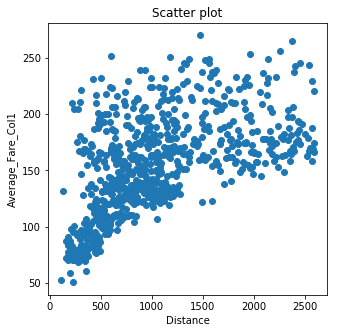

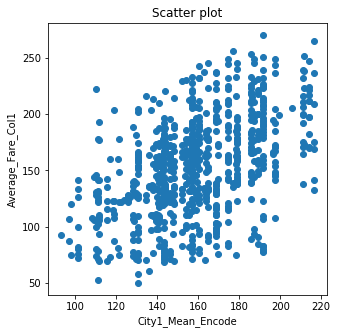

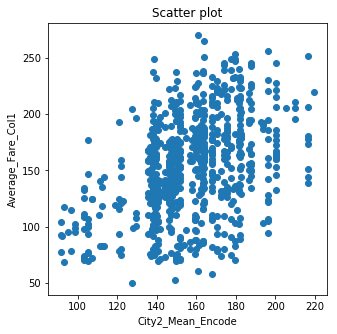

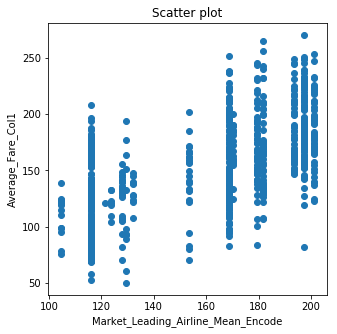

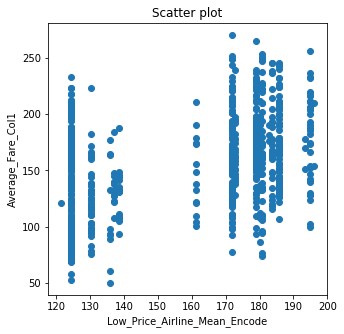

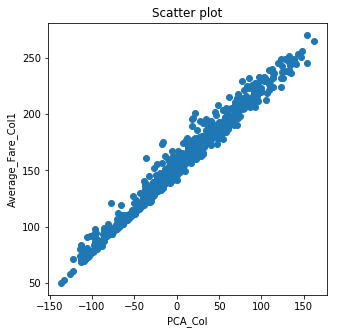

In [119]:
#Scatter Plot of Independent Variables and Dependent Variables

for col in features.columns:

    plt.figure(figsize=(5,5))
    
    plt.scatter(features[col], target)
    
    plt.title('Scatter plot')
    
    plt.xlabel(col)
    
    plt.ylabel("Average_Fare_Col1")
    
    plt.show()



Point 6: Splitting the Data into Training and Testing Data

In [120]:
X_train, X_test, Y_train, Y_test = train_test_split(features,target,test_size=0.30)

Point 7: Developing the Model and printing the coefficients and intercept

In [121]:
regression=LinearRegression()

In [122]:
prod_model=regression.fit(X_train,Y_train)

In [123]:
#Printing the Coefficients

for idx, col_name in enumerate(X_train.columns):
    
    print("The coefficient for {} is {}".format(col_name, prod_model.coef_[idx]))
    
    print("\n")

The coefficient for Distance is 0.0036424304793935894


The coefficient for City1_Mean_Encode is 0.052843580097166255


The coefficient for City2_Mean_Encode is 0.04469299456045578


The coefficient for Market_Leading_Airline_Mean_Encode is 0.005463455121272362


The coefficient for Low_Price_Airline_Mean_Encode is 0.012777323490086308


The coefficient for PCA_Col is 0.669274254668479




In [124]:
#Print the Slope of the Model

slope=prod_model.intercept_

print("Slope of the Model is:",slope)


Slope of the Model is: 130.5295209035088


In [125]:
#Predict the Target on basis of Test Data

predicted_Y=regression.predict(X_test)

Point 8: Print the Accuracy of Model

In [126]:
#Calculate the Test r2 Score

r2_score=r2_score(Y_test,predicted_Y)

print("Test r2 Score is:",r2_score)

Test r2 Score is: 0.9694763887792092


In [127]:
#Calculate the Test MSE

model_mse = np.mean((predicted_Y-Y_test)**2)

final_mse=math.sqrt(model_mse)

print ("MSE of Model is:",final_mse)

MSE of Model is: 7.2946995978958


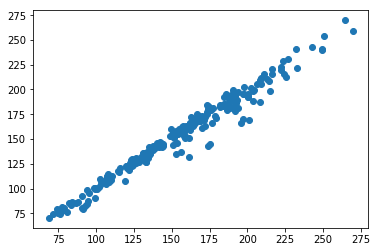

In [128]:
#Plotting the Predicted Target and Observed Target

plt.scatter(Y_test, predicted_Y)

Trying K-Fold to reduce MSE and improve r2 for Test Data

In [129]:
from sklearn.model_selection import KFold,cross_val_score 
from sklearn.pipeline import make_pipeline

In [130]:
pipeline=make_pipeline(regression)

In [131]:
kf=KFold(n_splits=10,shuffle=True,random_state=1)
cv_results=cross_val_score(pipeline,features,target,cv=kf,scoring="r2")

In [132]:
print("r2 Score for various runs of model:\n",cv_results)

r2 Score for various runs of model:
 [0.9763206  0.97989127 0.98018758 0.97966275 0.97214917 0.98130152
 0.99000657 0.97357676 0.98796933 0.96008018]


In [133]:
print("Taking Mean for r2 scores of all Models developed using K-fold:",cv_results.mean())

Taking Mean for r2 scores of all Models developed using K-fold: 0.9781145703374214


My Doubts and Queries :(

Doubt 1: 
    
After removing so many outliers(nearly 200),boxplot still shows that each column still has 

many outliers.Till 2 rows are left, all records are shown as outlier. Why? step[106]

Is my way to calculate the Outlier is wrong? 

Doubt 2:
    
How the outliers should be removed from data? For each Independent Variable, outliers should be 

removed considering data as Univariate data or outliers should be removed by considering 

data as Multivariate dat or both as done by me in this assignment? 


Doubt 3:
    
As per my current knowledge, I thought that calculating the Studentized Residuals will be the best

way to detect the Outliers.But calculating Studentized Residuals was not easy.

While working Professionally, Is Studentized Residuals the standard way to detect the Outliers?

What are the appropriate ways to calculate the Outliers (While working Professionally)

Doubt 4:

Can I use statsmodel.api method's OLS to get the Studentized Residulas while I fit the original

model using Linear Regression using scikit library

Doubt 5:

How outliers are checked in Categorical Columns before converting them into numerical?

Doubt 6:

How to calculate the Tolerance value to check the Multicollinearity

Doubt 7:
    
How to find which Independent Variable is highly correlated to which other Independent Variable

I cannot determine that while calculating VIF in step[111]

Any other efficient way to calculate the VIF?

Doubt 8:
    
Why I am calculating the square root of MSE? step[127]

Also what value for MSE is considered as good MSE?
         



# Please evaluate my assignment like I have to deploy this model in Production



         

# What are the things I could have done better?